# Assignment 4

-----
Kyle Groenewald

201710099

Sol Plaatje University

BSc. Hons in Data Science

----

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.array([0, 0.1, 2, 4])
y = np.array([4, 0.9, 3.6, 5])

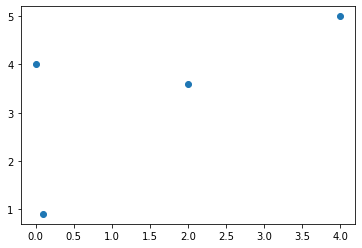

In [3]:
plt.scatter(x,y)
plt.show()

In [4]:
smooth = 20 # graph smoothness, affects number of points sampled
x_prior = np.linspace(-2,7,smooth)

In [5]:
# covariance matrix

def Kernel(x):
    return np.exp(- np.array([(x-xi)**2 for xi in x]))

In [6]:
K_prior = Kernel(x_prior)
mu_prior = np.zeros_like(x_prior)
f_prior = np.random.multivariate_normal(mu_prior, K_prior, 10)

In [7]:
x_joint = np.r_[x, x_prior]
K_joint = Kernel(x_joint)

In [8]:
n = x.size
K = K_joint[:n,:n]
Kx =  K_joint[n:,:n]
Kxx =  K_joint[n:,n:]

In [9]:
K_joint.shape

(24, 24)

In [10]:
mu_posterior = Kx@np.linalg.inv(K)@y
K_posterior = Kxx - Kx@np.linalg.inv(K)@Kx.T
f_posterior = np.random.multivariate_normal(mu_posterior, K_posterior, 10)

In [ ]:
mu_posterior.shape

In [ ]:
K_posterior.shape

In [ ]:
f_posterior.shape

In [ ]:
x.shape

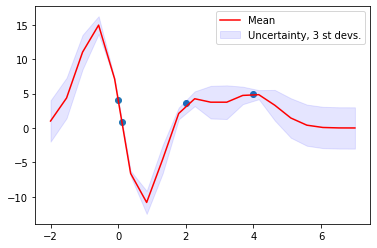

In [11]:
plt.scatter(x,y)
# plt.plot(x_prior, f_posterior.T, color = 'grey')
plt.plot(x_prior, mu_posterior, label = 'Mean', color = 'red')
plt.fill_between(x_prior, mu_posterior+3*np.sqrt(np.diag(K_posterior)),
         mu_posterior-3*np.sqrt(np.diag(K_posterior)), alpha = 0.1, color = 'blue', label = 'Uncertainty, 3 st devs.')
plt.legend()
plt.show()